In [44]:
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In [45]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

[[ 0.43126659]
 [-0.03811159]
 [-0.03425726]
 [-0.00181604]]
Intercept for OLS:
[0.83444968]
Training MSE for OLS:
0.02884516620358466
Test MSE for OLS:
0.04160233727078786
Beta values for Ridge implementation:
[[ 0.43126531]
 [-0.03811157]
 [-0.03425706]
 [-0.00181604]]
Intercept for Ridge:
[0.83444965]
Train MSE for Ridge:
0.028845166204285632
Test MSE for Ridge:
0.041602479907603594
Beta values for Ridge implementation:
[[ 0.43125376]
 [-0.03811141]
 [-0.03425534]
 [-0.00181607]]
Intercept for Ridge:
[0.83444944]
Train MSE for Ridge:
0.028845166273678134
Test MSE for Ridge:
0.04160376371014903
Beta values for Ridge implementation:
[[ 0.43113829]
 [-0.03810973]
 [-0.03423805]
 [-0.00181633]]
Intercept for Ridge:
[0.83444729]
Train MSE for Ridge:
0.028845173209144086
Test MSE for Ridge:
0.041616608779364954
Beta values for Ridge implementation:
[[ 0.42998704]
 [-0.03809282]
 [-0.03406567]
 [-0.00181891]]
Intercept for Ridge:
[0.83442575]
Train MSE for Ridge:
0.028845862988327264
Test 

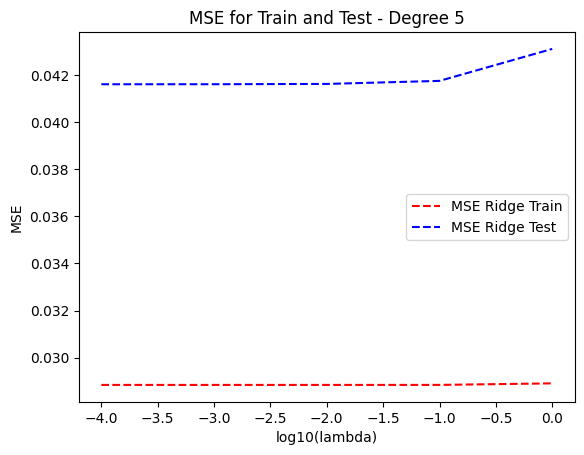

In [46]:
np.random.seed(2018)

n = 100
degree = 5

# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X = np.zeros((n, degree-1))
for d in range(1, degree): #No intercept column
    X[:, d-1] = (x**(d)).flatten()

# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SCALING DATA
X_train_mean = np.mean(X_train, axis = 0)
# Center by removing the mean
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
# Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler

# OLS
OLSbeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train
print(OLSbeta)
intercept = y_scaler - X_train_mean @ OLSbeta
print("Intercept for OLS:")
print(intercept)

ytildeOLS = X_train @ OLSbeta + intercept
print("Training MSE for OLS:")
print(MSE(y_train,ytildeOLS))

ypredictOLS = X_test @ OLSbeta + intercept
print("Test MSE for OLS:")
print(MSE(y_test,ypredictOLS))

# RIDGE REGRESSION
p = degree-1
I = np.eye(p,p)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ y_train
    intercept_ = y_scaler - X_train_mean @ Ridgebeta # The intercept can be shifted so the model can predict on uncentered data
    # Prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)
    print("Beta values for Ridge implementation:")
    print(Ridgebeta)
    print('Intercept for Ridge:')
    print(intercept_)
    print("Train MSE for Ridge:")
    print(MSEtraining[i])
    print("Test MSE for Ridge:")
    print(MSEtest[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel("MSE")
plt.title('MSE for Train and Test - Degree 5')
plt.legend()
plt.show()

Degree = 10

[[ 9.56570989e-02]
 [-5.67902580e-01]
 [ 2.29711648e-01]
 [ 2.67169703e-01]
 [-5.20012918e-02]
 [-4.37686290e-02]
 [ 3.12713581e-03]
 [ 2.24259529e-03]
 [-2.02572576e-05]]
Intercept for OLS:
[0.98358001]
Training MSE for OLS:
0.006872647989975172
Test MSE for OLS:
0.011755460765644193
Beta values for Ridge implementation:
[[ 9.56615607e-02]
 [-5.67876498e-01]
 [ 2.29704061e-01]
 [ 2.67156230e-01]
 [-5.19982448e-02]
 [-4.37663393e-02]
 [ 3.12668672e-03]
 [ 2.24247166e-03]
 [-2.02351513e-05]]
Intercept for Ridge:
[0.98357241]
Train MSE for Ridge:
0.006872648014959214
Test MSE for Ridge:
0.01175508985276533
Beta values for Ridge implementation:
[[ 9.57016839e-02]
 [-5.67641869e-01]
 [ 2.29635820e-01]
 [ 2.67035024e-01]
 [-5.19708386e-02]
 [-4.37457412e-02]
 [ 3.12264737e-03]
 [ 2.24135950e-03]
 [-2.00363145e-05]]
Intercept for Ridge:
[0.98350404]
Train MSE for Ridge:
0.006872650486237575
Test MSE for Ridge:
0.011751756315817315
Beta values for Ridge implementation:
[[ 9.60996422e-02]
 [-5

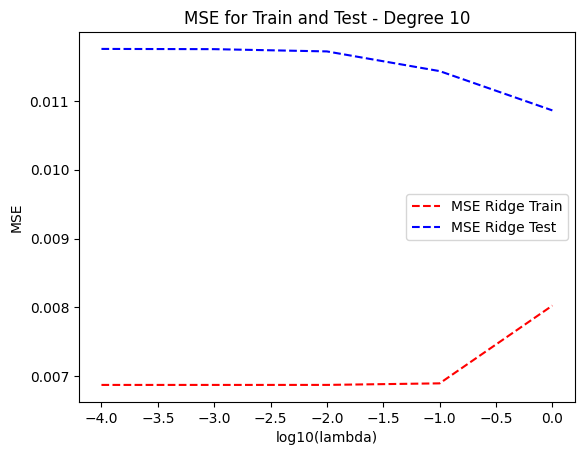

In [47]:
np.random.seed(2018)

n = 100
degree = 10

# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X = np.zeros((n, degree-1))
for d in range(1, degree): #No intercept column
    X[:, d-1] = (x**(d)).flatten()

# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SCALING DATA
X_train_mean = np.mean(X_train, axis = 0)
# Center by removing the mean
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
# Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler

# OLS
OLSbeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train
print(OLSbeta)
intercept = y_scaler - X_train_mean @ OLSbeta
print("Intercept for OLS:")
print(intercept)

ytildeOLS = X_train @ OLSbeta + intercept
print("Training MSE for OLS:")
print(MSE(y_train,ytildeOLS))

ypredictOLS = X_test @ OLSbeta + intercept
print("Test MSE for OLS:")
print(MSE(y_test,ypredictOLS))

# RIDGE REGRESSION
p = degree-1
I = np.eye(p,p)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ y_train
    intercept_ = y_scaler - X_train_mean @ Ridgebeta # The intercept can be shifted so the model can predict on uncentered data
    # Prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)
    print("Beta values for Ridge implementation:")
    print(Ridgebeta)
    print('Intercept for Ridge:')
    print(intercept_)
    print("Train MSE for Ridge:")
    print(MSEtraining[i])
    print("Test MSE for Ridge:")
    print(MSEtest[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel("MSE")
plt.title('MSE for Train and Test - Degree 10')
plt.legend()
plt.show()

Degree = 15

[[ 2.96845994e-02]
 [-4.57892624e-01]
 [ 4.33778606e-01]
 [ 1.52856531e-02]
 [-2.20756332e-01]
 [ 1.38944652e-01]
 [ 6.25702769e-02]
 [-5.68273372e-02]
 [-1.02411654e-02]
 [ 9.49431672e-03]
 [ 8.48476630e-04]
 [-7.43360849e-04]
 [-2.72406895e-05]
 [ 2.26176177e-05]]
Intercept for OLS:
[0.97770319]
Training MSE for OLS:
0.006516596563068066
Test MSE OLS:
0.013011899614845581
Beta values for Ridge implementation
[[ 2.97996810e-02]
 [-4.57766029e-01]
 [ 4.33436425e-01]
 [ 1.51123506e-02]
 [-2.20468591e-01]
 [ 1.39042764e-01]
 [ 6.24650806e-02]
 [-5.68553602e-02]
 [-1.02222425e-02]
 [ 9.49856835e-03]
 [ 8.46828576e-04]
 [-7.43687500e-04]
 [-2.71851544e-05]
 [ 2.26276105e-05]]
Intercept for Ridge:
[0.97768603]
Train MSE for Ridge:
0.0065165968885381505
Test MSE for Ridge:
0.01301017447879281
Beta values for Ridge implementation
[[ 3.08247264e-02]
 [-4.56643098e-01]
 [ 4.30388230e-01]
 [ 1.35795850e-02]
 [-2.17905360e-01]
 [ 1.39908631e-01]
 [ 6.15280015e-02]
 [-5.71022819e-02]
 [-1.00536832

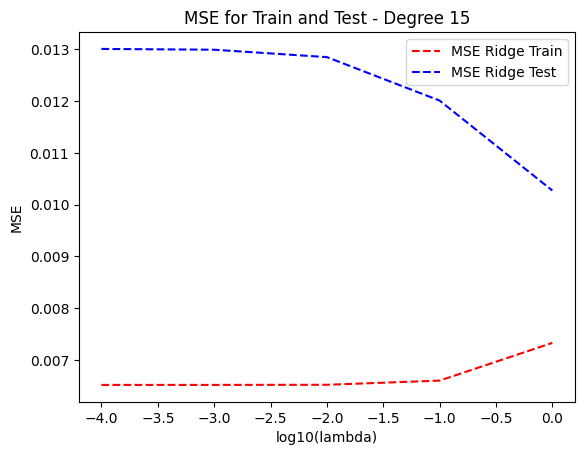

In [48]:
np.random.seed(2018)

n = 100
degree = 15

# Make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

X = np.zeros((n, degree-1))
for d in range(1, degree): #No intercept column
    X[:, d-1] = (x**(d)).flatten()

# Split data set in training and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SCALING DATA
X_train_mean = np.mean(X_train, axis = 0)
# Center by removing the mean
X_train_scaled = X_train - X_train_mean 
X_test_scaled = X_test - X_train_mean
# Remove the intercept from the training data.
y_scaler = np.mean(y_train)           
y_train_scaled = y_train - y_scaler

# OLS
OLSbeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train
print(OLSbeta)
intercept = y_scaler - X_train_mean @ OLSbeta
print("Intercept for OLS:")
print(intercept)

ytildeOLS = X_train @ OLSbeta + intercept
print("Training MSE for OLS:")
print(MSE(y_train,ytildeOLS))

ypredictOLS = X_test @ OLSbeta + intercept
print("Test MSE OLS:")
print(MSE(y_test,ypredictOLS))

# RIDGE REGRESSION
p = degree-1
I = np.eye(p,p)
lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
MSEtraining = np.zeros(len(lambdas))
MSEtest = np.zeros(len(lambdas))
for i in range(len(lambdas)):
    lmb = lambdas[i]
    Ridgebeta = np.linalg.inv(X_train_scaled.T @ X_train_scaled+lmb*I) @ X_train_scaled.T @ y_train
    intercept_ = y_scaler - X_train_mean @ Ridgebeta # The intercept can be shifted so the model can predict on uncentered data
    # Prediction
    ytildeRidge = X_train_scaled @ Ridgebeta + y_scaler
    ypredictRidge = X_test_scaled @ Ridgebeta + y_scaler
    MSEtraining[i] = MSE(y_train, ytildeRidge)
    MSEtest[i] = MSE(y_test, ypredictRidge)
    print("Beta values for Ridge implementation")
    print(Ridgebeta)
    print('Intercept for Ridge:')
    print(intercept_)
    print("Train MSE for Ridge:")
    print(MSEtraining[i])
    print("Test MSE for Ridge:")
    print(MSEtest[i])

# Now plot the results
plt.figure()
plt.plot(np.log10(lambdas), MSEtraining, 'r--', label = 'MSE Ridge Train')
plt.plot(np.log10(lambdas), MSEtest, 'b--', label = 'MSE Ridge Test')
plt.xlabel('log10(lambda)')
plt.ylabel("MSE")
plt.title('MSE for Train and Test - Degree 15')
plt.legend()
plt.show()

The MSE for train is always lower than the MSE for test (and it makes sense, since we are training our model on the train set, so it should be better working on the train set than on the test set). 

For degree 5, the results of OLS and Ridge (with the lowest values of lambda) are very similar: the MSE is almost the same, for both train and test data. For higher values of lambda, the MSE of Ridge regression starts increasing: it is not shown in the graph (because the exercise required to work with specific values of lambda), but if we change and increase the value of lambda, we can see that le curve of the MSE (for both train and test data) starts increasing very fast.

For degree 10, almost the same thing happens (as in degree 5). The only difference is that, for $\lambda = 0.1$ and  $\lambda = 1.0$, while the train MSE increases, the test MSE decreases a bit. This trend doesn't last long: for higher values of lambda, we can see both errors increasing.

The behaviour of the model for degree 15 is preatty much the same as the one for degree 10. Also the values of the errors are very similar (but different from the case of degree 5, where the error values are higher).